In [106]:
from sklearn import preprocessing
from scipy import stats 
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from scipy import stats
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

In [137]:
data = pd.read_csv('../input/cleaned_data.csv')
data = data.drop(columns=['GINI index (World Bank estimate), average 2000-15'])

In [143]:
data.drop(columns=['Happiness Score',
                       'country', 
                       'year',
                       'Standard deviation of happiness score by country-year',
                       'Standard deviation/Mean of happiness score by country-year', 
                       'gini of household income reported in Gallup, by wp5-year']).columns

Index(['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality'],
      dtype='object')

In [146]:
data = data.dropna()

X = data.drop(columns=['Happiness Score',
                       'country', 
                       'year',
                       'Standard deviation of happiness score by country-year',
                       'Standard deviation/Mean of happiness score by country-year', 
                       'gini of household income reported in Gallup, by wp5-year'])

shortened_cols = ['log_GDP',
                  'social_support', 
                 'life_expectancy', 
                 'freedom', 
                 'generosity', 
                 'corruption', 
                 'positive_affect', 
                 'negative_affect',
                 'government_trust',
                 'democratic_quality',
                 'delivery_quality',
                 ]

X.columns = shortened_cols

X_scaled = X.apply(lambda c: (c - c.min()) / (c.max() - c.min()))

y = data['Happiness Score']

In [147]:
X_scaled.head()

,log_GDP,social_support,life_expectancy,freedom,generosity,corruption,positive_affect,negative_affect,government_trust,democratic_quality,delivery_quality
0,0.146729,0.230189,0.295157,0.632975,0.504406,0.892847,0.266965,0.324501,0.587459,0.077887,0.047705
1,0.177344,0.375989,0.305855,0.579078,0.526185,0.859462,0.381035,0.282714,0.586890,0.047483,0.052680
2,0.187142,0.357007,0.315773,0.470826,0.460249,0.708347,0.440127,0.358417,0.249329,0.061378,0.057106
3,0.192406,0.331229,0.325016,0.327588,0.497920,0.734022,0.428291,0.342281,0.258010,0.080722,0.057343
4,0.211340,0.330559,0.333836,0.375735,0.569698,0.780971,0.598646,0.343755,0.396472,0.100926,0.109956


In [148]:
# build ols formula
f = '+'.join(shortened_cols)

f

'log_GDP+social_support+life_expectancy+freedom+generosity+corruption+positive_affect+negative_affect+government_trust+democratic_quality+delivery_quality'

In [149]:
# regression using OLS

ols_train = X_scaled.copy()
ols_train['y'] = y

results = smf.ols('y ~ social_support+life_expectancy+freedom+generosity+corruption+positive_affect+negative_affect+government_trust+democratic_quality+delivery_quality+log_GDP', data=ols_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     451.9
Date:                Fri, 07 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:48:50   Log-Likelihood:                -1156.9
No. Observations:                1447   AIC:                             2338.
Df Residuals:                    1435   BIC:                             2401.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.7758      0

In [150]:
X_train = X_scaled
coefs = []

for alpha in np.linspace(0, 0.25, num=10):
    coef = {'alpha': -alpha}
    reg = Lasso(alpha=alpha).fit(X_train, y)
    for i, c in enumerate(X_train.columns):
        coef[c] = reg.coef_[i]
    coef['score'] = reg.score(X_train, y)
    coefs.append(coef)
    print("intercept:",reg.intercept_)

coefs_df = pd.DataFrame(coefs).set_index('alpha')
coefs_df.head()

intercept: 2.7757757057856036
intercept: 2.580215709725384
intercept: 3.4609670092013403
intercept: 4.206881526179058
intercept: 4.5145053107731
intercept: 4.812617490189464
intercept: 5.110734988088876
intercept: 5.383247236893388
intercept: 5.431165826839666
intercept: 5.431165826839666


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,corruption,delivery_quality,democratic_quality,freedom,generosity,government_trust,life_expectancy,log_GDP,negative_affect,positive_affect,score,social_support
alpha,,,,,,,,,,,,
-0.000000,-0.811437,0.312306,-0.295121,0.619180,0.31231,-0.713922,0.967763,1.629650,-0.005801,1.251103,0.775980,1.210533
-0.027778,-0.000000,0.687434,0.000000,0.171679,0.00000,-0.000000,0.768375,1.521843,-0.000000,1.006211,0.732536,0.716528
-0.055556,-0.000000,0.794814,0.000000,0.000000,0.00000,-0.000000,0.418313,1.569745,-0.000000,0.579459,0.649995,0.224025
-0.083333,-0.000000,0.845957,0.000000,0.000000,0.00000,-0.000000,0.046535,1.529350,-0.000000,0.000000,0.525818,0.000000
-0.111111,-0.000000,0.689129,0.000000,0.000000,0.00000,-0.000000,0.000000,1.137460,-0.000000,0.000000,0.436477,0.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

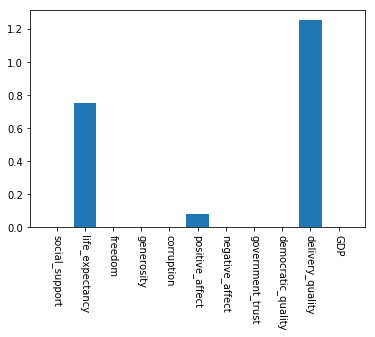

In [71]:
plt.bar(x=X_train.columns,height=reg.coef_)
plt.xticks(rotation=-90)

Text(0,0.5,'Scaled Coefficient')

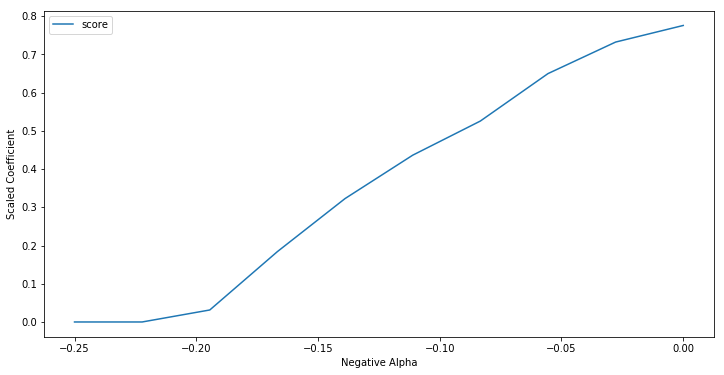

In [155]:
coefs_df[['score']].plot(figsize=(12, 6))

plt.xlabel('Negative Alpha')
plt.ylabel('Scaled Coefficient')

Text(0,0.5,'Scaled Coefficient')

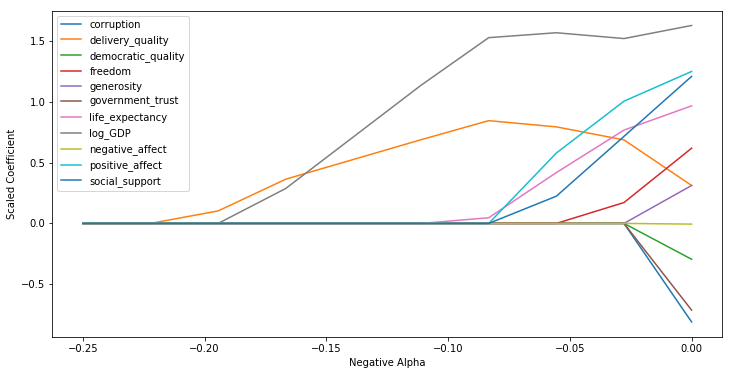

In [154]:
import seaborn as sns

coefs_df.drop('score', axis=1).plot(figsize=(12, 6))
plt.xlabel('Negative Alpha')
plt.ylabel('Scaled Coefficient')

In [163]:
print(X.columns)

Index(['Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality',
       'Standard deviation of happiness score by country-year',
       'Standard deviation/Mean of happiness score by country-year',
       'gini of household income reported in Gallup, by wp5-year',
       'GDP per capita'],
      dtype='object')
